# Assignment 8: Moving Beyond Linearity

## Greg DeVore
## ML210
## March 6th, 2018

Dataset(s) needed:
Wage data frame of the ISLR library SF-DAT-21 (https://github.com/ga-students/sf-dat-21/tree/master/unit-projects/dataset)

Libraries needed:
stats
gam

In [2]:
require(stats)
require(curl)
require(ISLR)
require(dplyr)

# Load wage and admissions data
wage.data  <- Wage
admissions.data <- read.csv(curl('https://raw.githubusercontent.com/ga-students/sf-dat-21/master/unit-projects/dataset/admissions.csv'))

# View data frame contents
cat('Wage Data:\n\n')
str(wage.data)
cat('\nAdmissions Data:\n\n')
str(admissions.data)

Wage Data:

'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...

Admissions Data:

'data.frame':	400 obs. of  4 variables:
 $ admit   : int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre     : int  380 660 800 640 520 760 560 400 540 700 ..

### 1. Using the wage data, find polynomial fit for wage depending on age. Select the best value for the degree.


In [3]:
# Fit degree 1-5 polynomials for wage ~ age
fit.1 = lm(wage~age, data=wage.data)
fit.2 = lm(wage~poly(age,2), data=wage.data)
fit.3 = lm(wage~poly(age,3), data=wage.data)
fit.4 = lm(wage~poly(age,4), data=wage.data)
fit.5 = lm(wage~poly(age,5), data=wage.data)
# Use ANOVA to compare models sequentially
anova(fit.1,fit.2,fit.3,fit.4,fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


The ANOVA test compares each of the nested models (linear through degree-5 polynomials) and lists whether each model improves on the former in terms of the reduction of the residual sum of squares for the fit. If the p-value for a given model is significant (less than 0.05 in this case), then it improves on the simpler model that uses a one-degree lower polynomial.

Here, the p-value comparing the quadratic model to the linear is nearly zero, meaning it is a significant improvement, and that the linear model is not sufficient. Similarly, the cubic model is a significant improvement over the quadratic model. The p-value comparing the quartic model to the cubic is just over 0.05, meaning there is some improvement, but not enough to be significant. Finally, the 5th degree polynomial is not a significant improvement over the quartic model.

Given these results, the cubic polynomial should be selected as the 'best' model to fit wage as a function of age.

### 2. Using the wage data, construct a generalized additive model and compare to linear regression. 


Family: gaussian 
Link function: identity 

Formula:
wage ~ s(year, k = length(unique(wage.data$year))) + s(age, k = length(unique(wage.data$age))) + 
    maritl + race + education + jobclass + health + health_ins

Parametric coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  80.7351     2.8047  28.786  < 2e-16 ***
maritl2. Married             13.4560     1.8093   7.437 1.34e-13 ***
maritl3. Widowed              0.3776     7.9569   0.047  0.96215    
maritl4. Divorced             0.1873     2.9253   0.064  0.94895    
maritl5. Separated            7.5436     4.8482   1.556  0.11982    
race2. Black                 -4.7828     2.1313  -2.244  0.02490 *  
race3. Asian                 -2.6922     2.5855  -1.041  0.29783    
race4. Other                 -5.4265     5.6252  -0.965  0.33478    
education2. HS Grad           7.7144     2.3523   3.280  0.00105 ** 
education3. Some College     18.3014     2.5034   7.311 3.40e-13 ***


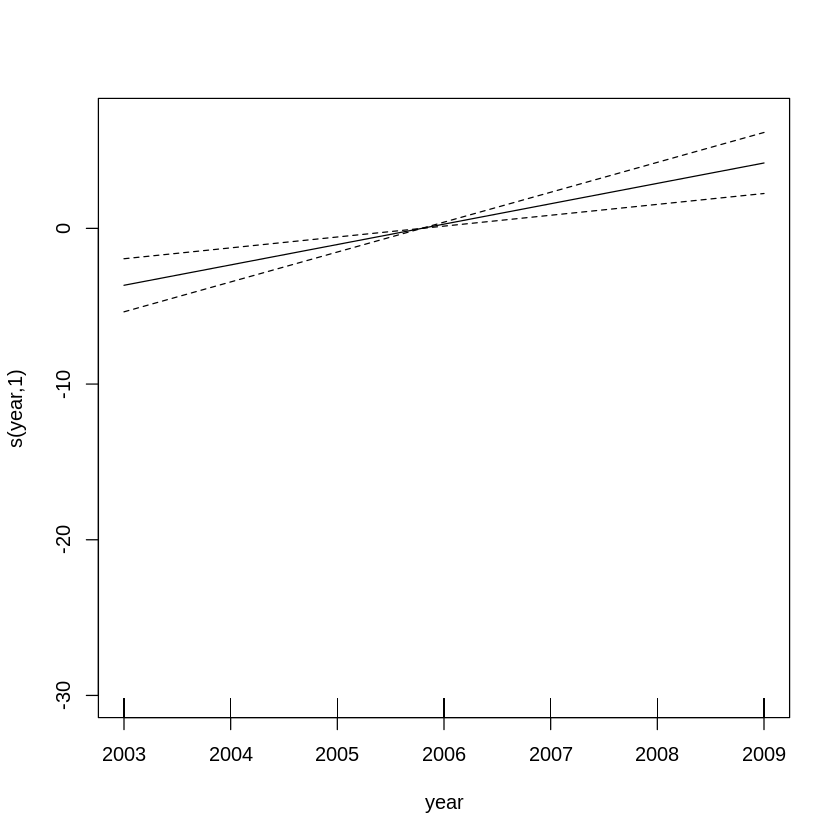

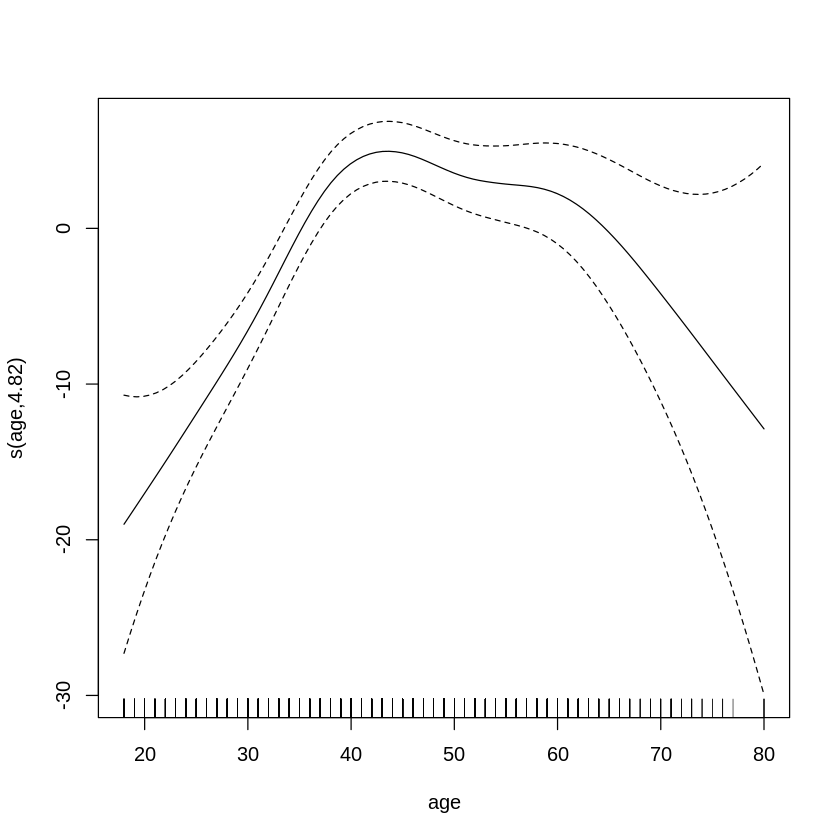

In [5]:
# Construct a GAM of the wage data, using smoothing splines for all numeric predictors
# Note: Region has only one level (mid-atlantic), so it will be ignored
library(mgcv)
gam.wage <- gam(wage ~ s(year, k = length(unique(wage.data$year))) + 
                s(age, k = length(unique(wage.data$age))) + maritl + 
                race + education + jobclass + health + health_ins, data = wage.data)
summary(gam.wage)
plot.gam(gam.wage)

In [6]:
# Construct a linear model of the wage data
# Note: Region has only one level (mid-atlantic), so it will be ignored
lm.wage <- lm(wage ~ ., data = wage.data %>% select(-c(region,logwage)))
summary(lm.wage)


Call:
lm(formula = wage ~ ., data = wage.data %>% select(-c(region, 
    logwage)))

Residuals:
    Min      1Q  Median      3Q     Max 
-100.33  -18.70   -3.26   13.29  212.79 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.423e+03  6.165e+02  -3.931 8.67e-05 ***
year                         1.241e+00  3.074e-01   4.037 5.54e-05 ***
age                          2.707e-01  6.223e-02   4.350 1.41e-05 ***
maritl2. Married             1.718e+01  1.720e+00   9.985  < 2e-16 ***
maritl3. Widowed             2.052e+00  8.005e+00   0.256  0.79774    
maritl4. Divorced            3.967e+00  2.887e+00   1.374  0.16951    
maritl5. Separated           1.153e+01  4.844e+00   2.380  0.01736 *  
race2. Black                -5.096e+00  2.146e+00  -2.375  0.01760 *  
race3. Asian                -2.814e+00  2.603e+00  -1.081  0.27978    
race4. Other                -6.059e+00  5.666e+00  -1.069  0.28505    
education2. HS Grad      

Overall, the GAM and linear regression models ended up being quite similar. Both have similar $R^2$ values, although the GAM value is slightly higher than the linear regression model. The slightly higher $R^2$ value for the GAM is most likely due to the fact that wage does not linearly depend on age (observe the smooth spline created for the age feature in the GAM). The linear model cannot capture this interaction, and hence the percent variance explained by that model is lower. The year does appear to be linearly related to wage (see the spline created for the year feature in the GAM), so both models are capturing that interaction accurately.

For the most part, the same features are considered significant for both models. A given person's wage is dependent on their age, education level, job class, overall health, and the current year (wages tend to rise year over year). For the categorical variables, one less dummy variable is created relative to the number of levels. In this case, the baseline individual (all levels not listed in the summary) is someone who is single, white, has less than a high school education, is in an industrial job, has poor health but does have health insurance. 

Each of the estimated coefficients for a categorical feature is the difference in wage relative to that baseline. For marital status, somone who is married earns more than someone who is single (the coefficient is significant), but there is no statistical evidence of a relationship for someone who is widowed or divorced (coefficients are not significant). Note that someone being separated has an effect on their wage in the linear regression model, but not the GAM. Similarly, someone who is Black earns less than someone who is White (all other features being fixed), but there is no statistical evidence of a relationship when the person is Asian or 'Other'. For education levels, each jump in education level corresponds to a jump in wage, which makes sense. Someone in the 'Information' job class earns more than someone 'Industrial' job class, which also makes sense (think white-collar versus blue-collar jobs). Finally, someone in good health earns more someone who is not in good health, and someone who does not having health insurance makes less than someone who does. Again, all of these feature-level comparisons assume all other features are fixed.

### 3. Using the wage data, Create a smooth-spline model, having CV select the value of smoothing parameter and degrees of freedom.

Warning message in smooth.spline(wage.data$age, wage.data$wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

The smooth spline selected a lambda value of 0.02792303 
The smooth spline selected 6.794596 degrees of freedom

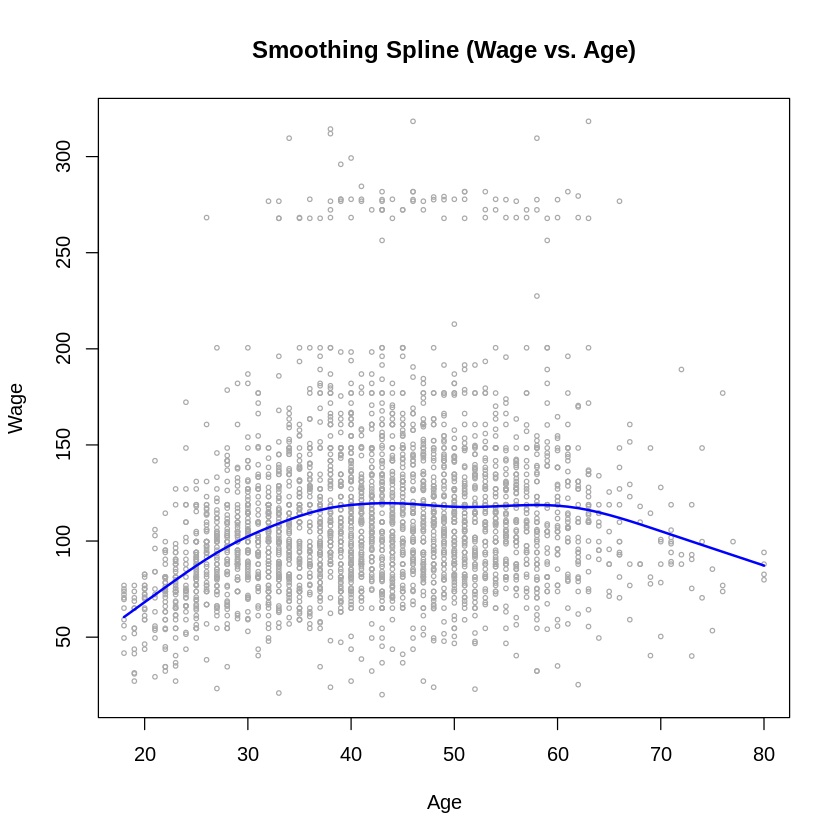

In [7]:
# Use CV to select lambda and dof for smoothing spline
spline.fit <- smooth.spline(wage.data$age,wage.data$wage,cv=TRUE)
cat('The smooth spline selected a lambda value of',spline.fit$lambda,'\n')
cat('The smooth spline selected',spline.fit$df,'degrees of freedom')
plot(wage.data$age,wage.data$wage,cex=.5,col="darkgrey",xlab='Age',ylab='Wage')
lines(spline.fit,col='blue',lwd=2)
title('Smoothing Spline (Wage vs. Age)')

### 4. Using the admissions data, predict grad school acceptance using regression splines.

In [8]:
library(splines)
# First, convert prestige to a factor (1 is 'most prestigious', 
# 4 is 'least prestigious')
# Leaving as a numeric feature is misleading
# Also convert admit (response) to factor
admissions.data[, c('admit','prestige')]  <- 
            lapply(admissions.data[, c('admit','prestige')],as.factor)
# Verify conversion worked
str(admissions.data)
# Check for missing values
cat('\nMissing values:')
sapply(admissions.data, function(x) sum(is.na(x)))
# Retain only complete observations
admissions.data <- admissions.data[complete.cases(admissions.data), ]
cat('After removing missing values, admissions data has ',
    nrow(admissions.data),'observations')

'data.frame':	400 obs. of  4 variables:
 $ admit   : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1 ...
 $ gre     : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa     : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ prestige: Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...

Missing values:

admit      gre      gpa prestige 
       0        2        2        1

After removing missing values, admissions data has  397 observations

        Admit
Prestige  0  1
       1 28 33
       2 95 53
       3 93 28
       4 55 12

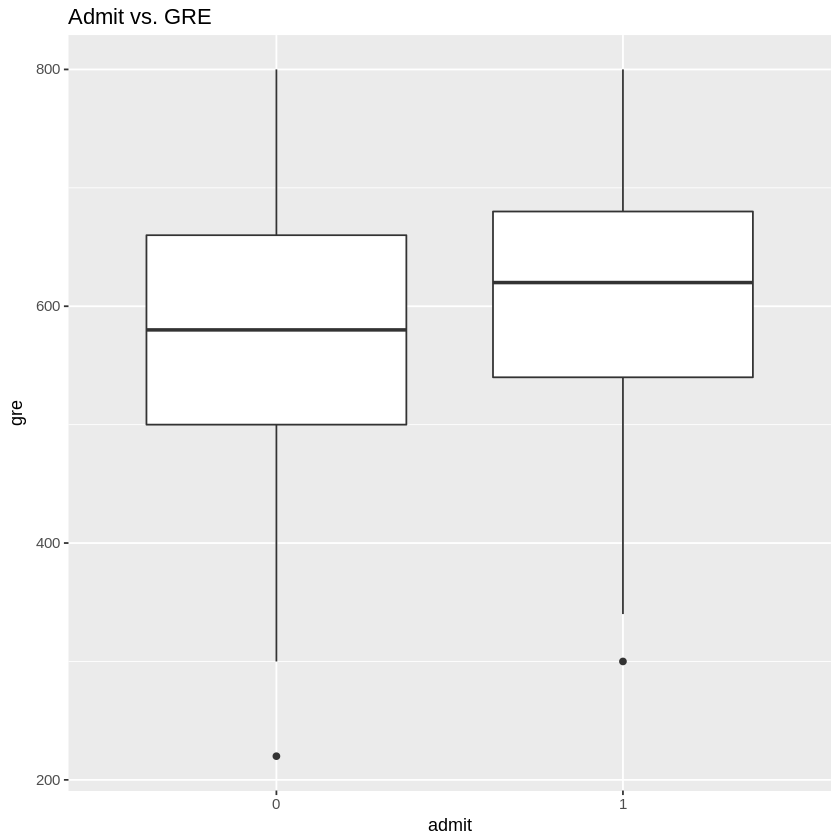

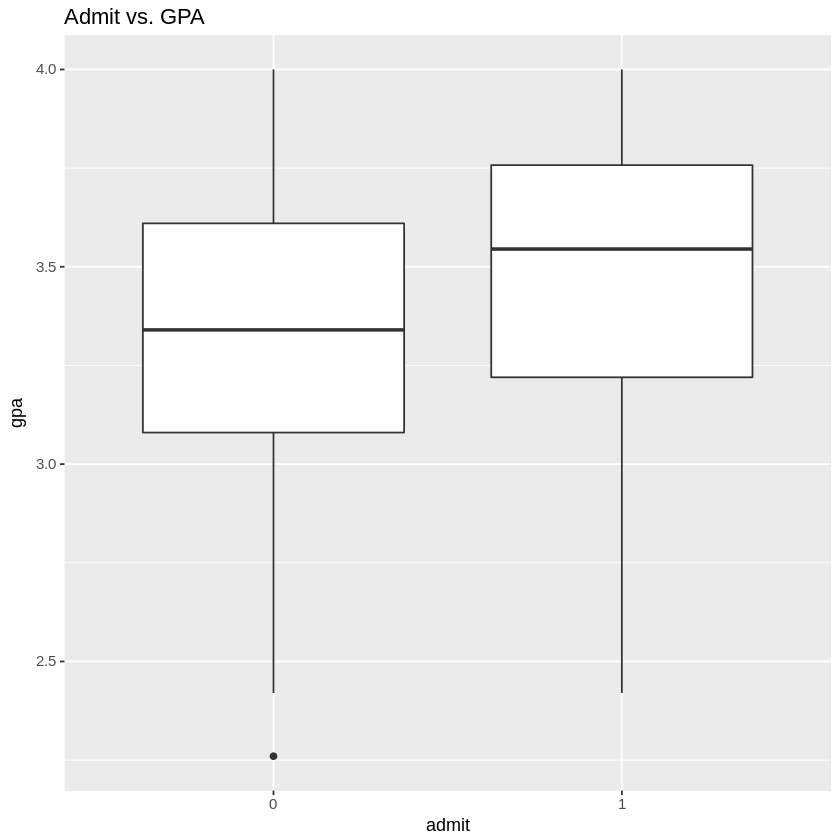

In [9]:
# Perform simple EDA before modeling
library(ggplot2)
table(admissions.data$prestige,admissions.data$admit, 
      dnn = c('Prestige','Admit'))
ggplot(admissions.data, aes(x = admit, y = gre)) + geom_boxplot() + 
    ggtitle('Admit vs. GRE')
ggplot(admissions.data, aes(x = admit, y = gpa)) + geom_boxplot() + 
    ggtitle('Admit vs. GPA')

As expected, the admittance rate is higher for prestigious schools (level '1'), and also for higher GRE and GPA scores.


Call: gam(formula = admit ~ bs(gpa, df = 5) + ns(gre, df = 1) + prestige, 
    family = "binomial", data = admissions.data)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.6525 -0.8771 -0.6231  1.1216  2.2384 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 496.154 on 396 degrees of freedom
Residual Deviance: 450.6431 on 387 degrees of freedom
AIC: 470.6431 

Number of Local Scoring Iterations: 4 

Anova for Parametric Effects
                 Df Sum Sq Mean Sq F value    Pr(>F)    
bs(gpa, df = 5)   5  12.18  2.4357  2.3948 0.0370770 *  
ns(gre, df = 1)   1   5.13  5.1253  5.0392 0.0253448 *  
prestige          3  21.47  7.1581  7.0378 0.0001284 ***
Residuals       387 393.62  1.0171                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


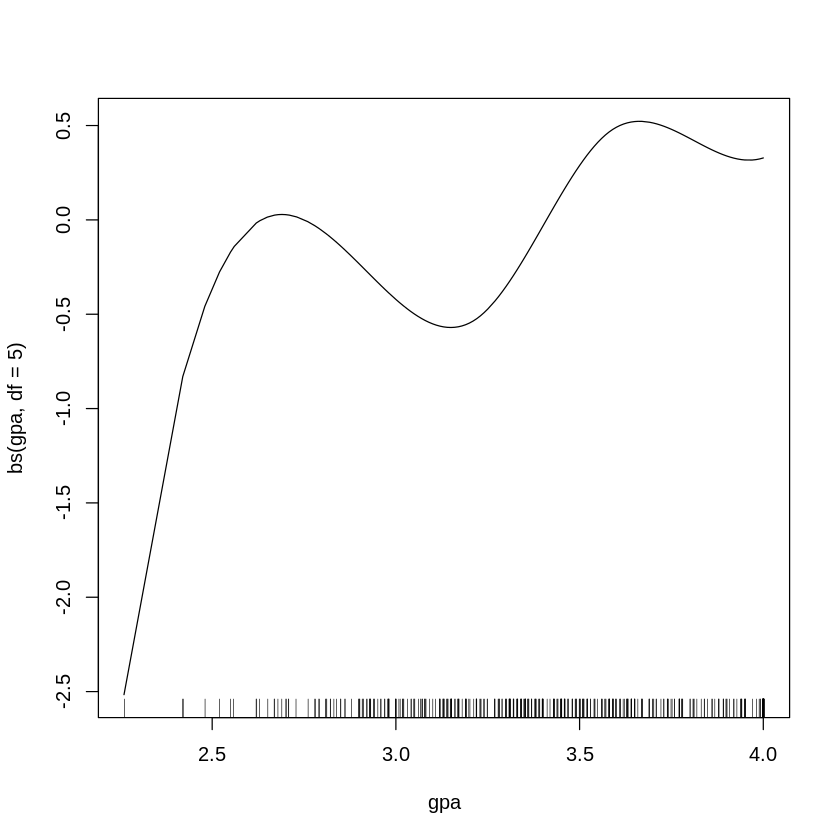

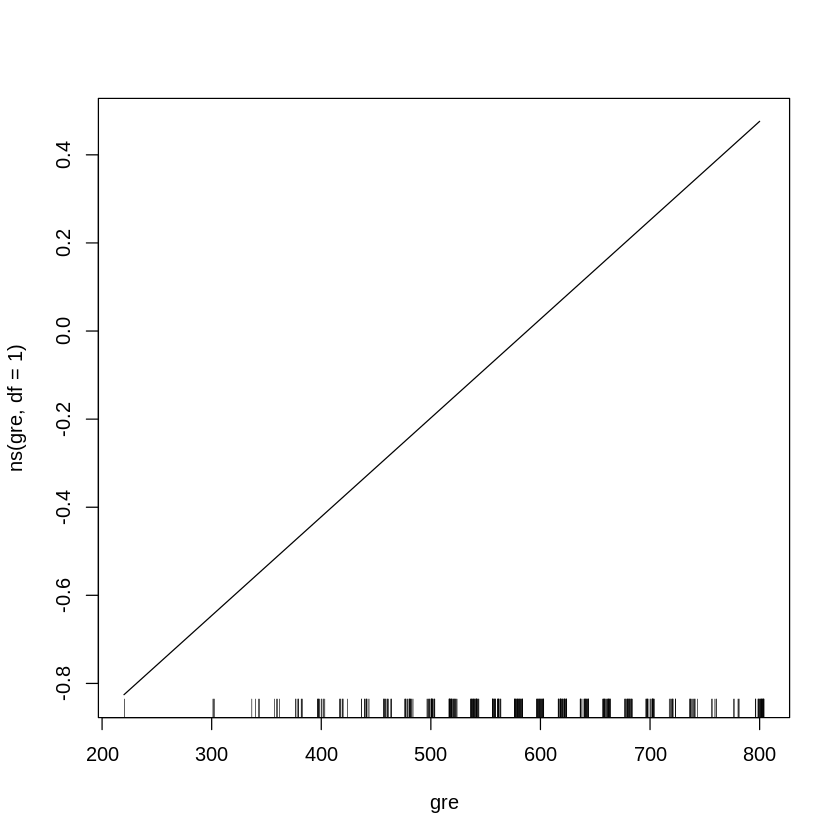

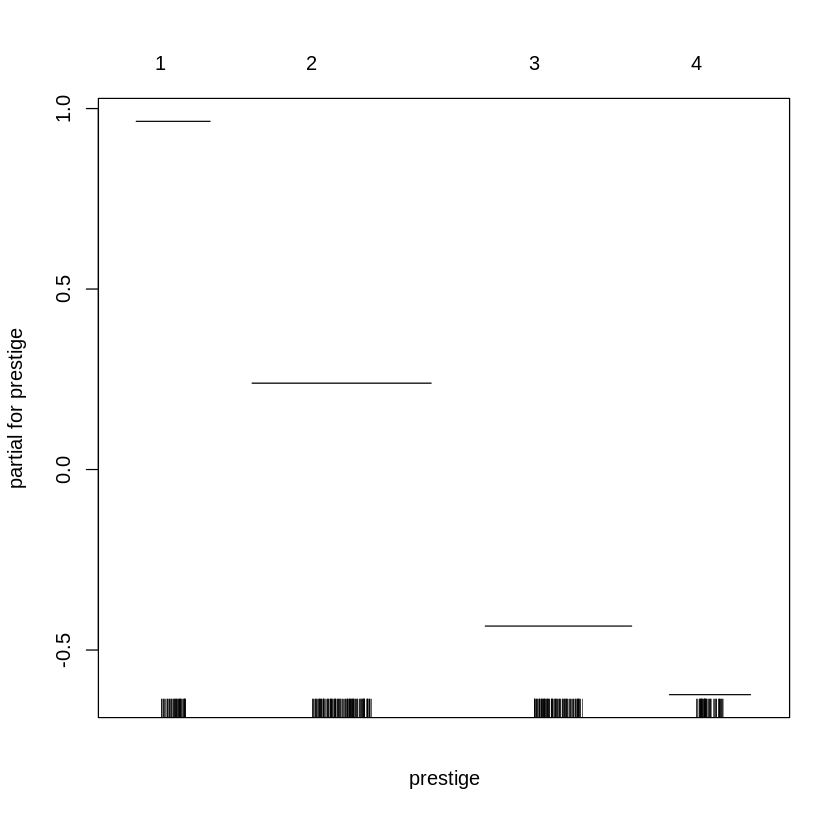

In [11]:
# Create a regression spline model for admittance
# Use a basis spline with 5-dof (quartic) for gpa 
# and a 1-dof (line) for gre (produces the best fit)
library(gam)
admit.spline <- gam(admit ~ bs(gpa, df=5) + ns(gre, df=1) + prestige, 
                    family='binomial', data = admissions.data)
summary(admit.spline)
plot(admit.spline)

### 5. Using your admissions data model, what is the effect of going from 3.0 GPA to 4.0 GPA on the odds of admission?

Looking at the results of the GAM using regression splines, the spline associated with GPA shows that admittance is lowest for low GPAs (not surpring). The admittance rate increases sharply until GPA is 2.8 and decreases until GPA is 3.2. From there, it increases sharply again until GPA is 3.7, and somewhat levels off until the maximum GPA of 4.0. This is somewhat intuitive, as the admittance rate generally increases with GPA, although there is some fluctuation. Perhaps a spline fit is not the best approach, and other methods should be tried for comparison (such as logistic regression). A fifth degree basis spline seemed to work best, natural splines and other degrees produced sharp dropoffs as the GPA approached 4.0, which is probably not realistic.

The spline associated with GRE is roughly linear, and admittance rate increases with GRE score. This is also intuitive.

Finally, the admittance rate increases with the level of prestige associated with the student's school. The most prestigous schools (level 1) have the highest admittance rate, and this decreases with the level of prestige.

To determine the change in odds of amission between a GPA of 3.0 and 4.0, we'll create two observations with GRE at the mean value and prestige at the most common level.

In [17]:
mean.gre <- mean(admissions.data$gre)
cat('The mean GRE score is',mean.gre,'\n')
cat('\nPrestige counts by level:')
table(admissions.data$prestige)
mode.prestige <- 2
cat('The most common prestige level is',mode.prestige,'\n')
# Observation for GPA = 3.0
gpa3 <- list(gpa=3.0,gre=mean.gre,prestige=as.factor(mode.prestige))
gpa4 <- list(gpa=4.0,gre=mean.gre,prestige=as.factor(mode.prestige))
pred3 <- predict(admit.spline, newdata = gpa3, type = 'response')
pred4 <- predict(admit.spline, newdata = gpa4, type = 'response')
cat('\nThe probability of acceptance with a GPA of 3.0 is',pred3,'\n')
cat('The probability of acceptance with a GPA of 4.0 is',pred4,'\n')
cat('\nThe odds of acceptance for a GPA of 3.0 is',pred3/(1-pred3),'\n')
cat('The odds of acceptance for a GPA of 4.0 is',pred4/(1-pred4),'\n')

The mean GRE score is 587.8589 

Prestige counts by level:


  1   2   3   4 
 61 148 121  67 

The most common prestige level is 2 

The probability of acceptance with a GPA of 3.0 is 0.2595446 
The probability of acceptance with a GPA of 4.0 is 0.4259376 

The odds of acceptance for a GPA of 3.0 is 0.3505203 
The odds of acceptance for a GPA of 4.0 is 0.7419709 


Looking at the above results, the odds of admittance increases significantly (in fact it more than doubles) if GPA increases from 3.0 to 4.0.